In [2]:
# Q1. Create a list of 5 real numbers. Define a function to compute the sum of those squared numbers. Print the summation output.

# a list of 5 real numbers
numbers = [1, 2, 3, 4, 5]

# function to compute the sum of those squared numbers
def sum_of_squared_numbers(numbers):
    return sum([number ** 2 for number in numbers])

# print the summation output
print(sum_of_squared_numbers(numbers))

55


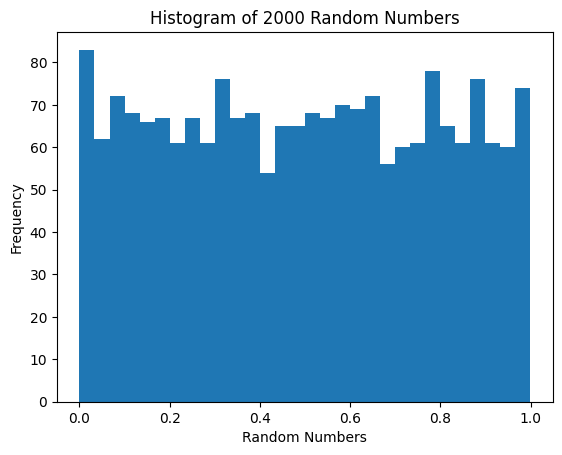

In [3]:
# Q2. Generate a array of 2000 random numbers using numpy. Create a histogram of 30 bins. Plot the histogram mentioning the axis lebel and appropriate title.


# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


# generate a array of 2000 random numbers using numpy
random_numbers = np.random.rand(2000)

# create a histogram of 30 bins
plt.hist(random_numbers, bins=30)

# plot the histogram mentioning the axis lebel and appropriate title
plt.xlabel('Random Numbers')
plt.ylabel('Frequency')
plt.title('Histogram of 2000 Random Numbers')
plt.show()


In [4]:
'''
Q3. Create a sample dataset with the following information:
 dataframe = 
        Gender: [Male, Female, Male, Female,Male, Female, Male, Female, Female, Male, Male, Female]
        Country: [USA, USA, Germany, USA, UK, UK, Germany, UK, UK, Germany, USA, UK]
        income: [50000, 55000, 27000, 68000, 52000, 75000, 76000, 58000, 65000, 43000]
        Car_Purchase_Possibility: [no, yes, no, yes, yes, yes, no, yes, yes, no, yes, no]

Load this dataframe using numpy and pandas. Apply preprocessing by handing missing values.
Also apply encoding on the categorical features. Finally scale the features for standardization.
'''

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Sample data
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Country': ['USA', 'USA', 'Germany', 'USA', 'UK', 'UK', 'Germany', 'UK', 'UK', 'Germany', 'USA', 'UK'],
    'income': [50000, 55000, 27000, 68000, 52000, 75000, 76000, 58000, 65000, 43000, np.nan, 47000],  # Added NaN value
    'Car_Purchase_Possibility': ['no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no']
}

# Load data into DataFrame
df = pd.DataFrame(data)

# Handling missing values by filling with the mean
df['income'] = df['income'].fillna(df['income'].mean())

# Encoding categorical features
label_encoders = {}
for column in ['Gender', 'Country', 'Car_Purchase_Possibility']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Scaling the features
scaler = StandardScaler()
df[['income']] = scaler.fit_transform(df[['income']])

print(df)


    Gender  Country    income  Car_Purchase_Possibility
0        1        2 -0.449930                         0
1        0        2 -0.074988                         1
2        1        0 -2.174660                         0
3        0        2  0.899859                         1
4        1        1 -0.299953                         1
5        0        1  1.424777                         1
6        1        0  1.499766                         0
7        0        1  0.149977                         1
8        0        1  0.674895                         1
9        1        0 -0.974848                         0
10       1        2  0.000000                         1
11       0        1 -0.674895                         0


In [ ]:
# Q4. Use the dataframe mentioned in Q3 for performing a classification task using kNN. You are asked to use 80-20 data splitting for the model. All needed hyperparameters can be assumed to perform better classification.

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Handling missing values by filling with the mean
df['income'] = df['income'].fillna(df['income'].mean())

# Encoding categorical features
label_encoders = {}
for column in ['Gender', 'Country', 'Car_Purchase_Possibility']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Scaling the features
scaler = StandardScaler()
df[['income']] = scaler.fit_transform(df[['income']])

# Splitting data into features and target
X = df[['Gender', 'Country', 'income']]
y = df['Car_Purchase_Possibility']

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

